### Flujo de calor bidimensional en estado estacionario

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

sin,cos,sinh,cosh,pi  = np.sin,np.cos,np.sinh,np.cosh,np.pi


En condiciones de estado estable en dos dimensiones, sin generación y con una conductividad térmica constante, la ecuación de calor es

$$ \frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2} = 0. (1)$$

La ecuación anterior es de segundo orden en $x$ y $y$, se necesitan dos condiciones de frontera para cada coordenada, estas son

$$\theta(0,y)=0, \qquad \theta(x,0)=0 (2)$$

$$\theta(L,y)=0,\qquad \theta(x,W)=1 (3)$$


La solución de la ecuación (1) es

$$\theta(x,y) = \dfrac{2}{\pi} \sum_{n=1}^{\infty} \dfrac{(-1)^{n+1}+1}{n} \sin \dfrac{n \pi x}{L} \dfrac{\sinh(n \pi y/L)}{\sinh(n\pi W/L)} (4)$$

con $L=100$ y $W=100$.

In [2]:
#defino la distribución de temperaturas
def T(x,y,L,W,N):
    T = x*0
    for n in range(1,N):        
        C   = ((-1)**(n+1))+1
        sn  = sin((n*pi*x)/L)
        snh = sinh((n*pi*y)/L)/sinh((n*pi*W)/L)
        T  += (2/pi)*sn*(C/n)*snh
    return T    

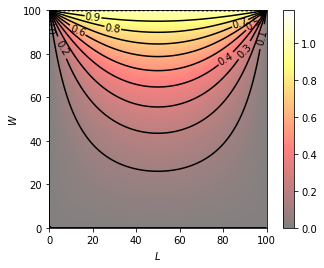

In [3]:
L = 100
W = 100
x = np.linspace(0,L, 100)
y = np.linspace(0,W, 100)
N = 100

X, Y = np.meshgrid(x, y)
Z    = T(X,Y,L,W,N)

contours = plt.contour(X, Y, Z,levels= 13, colors='black')
plt.clabel(contours, inline=True, fontsize=10)

plt.imshow(Z, extent=[0, L, 0, W], origin='lower',
           cmap='hot', alpha=0.5)

plt.xlabel("$L$")
plt.ylabel("$W$")
plt.colorbar()
plt.savefig('heq-isotherms.png')

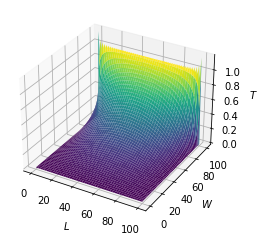

In [4]:
N = 100
x = np.linspace(0,L,100)
y = np.linspace(0,W,100)
X, Y = np.meshgrid(x, y)
Z  = T(X,Y,W,L,N)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("$L$")
ax.set_ylabel("$W$")
ax.set_zlabel("$T$")
ax.plot_surface(X,Y,Z,cmap='viridis', edgecolor='none')
plt.show()

Las componentes del flujo de calor por unidad de área $\mathbf{q}$ se determina a partir de la ecuación (4) con la Ley de Fourier


$$ \mathbf{q} = -k \nabla T = -k \left(\dfrac{\partial \theta}{\partial x} , \dfrac{\partial \theta}{\partial y} \right)(5)$$ 

with $k=0.1$

In [5]:
#líneas de flujo
def Q(x,y,W,L,N):
    qx = x*0
    qy = x*0
    k  = 0.1
    for i in range(1,N):
        C      = ((-1)**(i+1))+1
        csn    = cos((i*pi*x)/L)
        sn     = sin((i*pi*x)/L)
        snhy   = sinh((i*pi*y)/L)/sinh((i*pi*W)/L)
        csnhy  = cosh((i*pi*y)/L)/sinh((i*pi*W)/L)
        qx += -k*(2/pi)*(C/i)*((pi*i)/L)*(csn*snhy)
        qy += -k*(2/pi)*(C/i)*((pi*i)/L)*(sn*csnhy)
    return qx,qy  

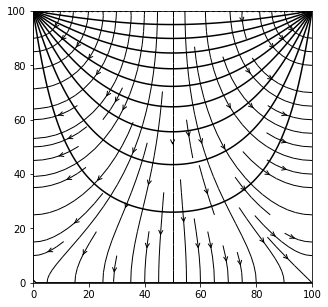

In [10]:
L = 100
W = 100
x = np.linspace(0,L, 100)
y = np.linspace(0,W, 100)
N = 100
X, Y = np.meshgrid(x, y)
qx,qy = Q(X,Y,W,L,N)
plt.figure(figsize=(5,5))
plt.contour(X, Y, Z,levels= 13, colors='black')
plt.streamplot(X,Y,qx,qy,density=0.7, color='black', linewidth=1, cmap='autumn',arrowstyle ='->',arrowsize = 1)
plt.show()